In [41]:
import sys
import numpy as np
import os
folder_a_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(folder_a_path)
import matplotlib.pyplot as plt
import pandas as pd

import json
import pickle

In [42]:
data_path = '/data/trf/python_works/BatteryLife/dataset/MATR'
cell_name = 'MATR_b2c0'
file_name = cell_name+'.pkl'
root_path = '/data/trf/python_works/BatteryLife/dataset'
prefix = cell_name.split('_')[0]
if prefix == 'MICH':
    with open(f'{root_path}/Life labels/total_MICH_labels.json') as f:
        life_labels = json.load(f)
elif prefix.startswith('Tongji'):
    file_name = cell_name.replace('--', '-#')
    with open(f'{root_path}/Life labels/Tongji_labels.json') as f:
        life_labels = json.load(f)
else:
    with open(f'{root_path}/Life labels/{prefix}_labels.json') as f:
        life_labels = json.load(f)

# file_name = file_name if self.dataset != 'Stanford_formation' else file_name.replace('Stanford_Formation_Nova_Formation-', 'Stanford_Nova_Regular_')
if file_name in life_labels:
    eol = life_labels[file_name]
else:
    eol = None
# MATR_b2c0, HUST_2-8, Stanford_Nova_Regular_195, CALCE_CS2_38, XJTU_2C_battery-7, HNEI_18650_NMC_LCO_25C_0-100_0.5-1.5C_g
# MICH_BLForm17_pouch_NMC_25C_0-100_1-1C_g, UL-PUR_N10-OV8_18650_NCA_23C_0-100_0.5-0.5C_h, RWTH_020
data = pickle.load(open(os.path.join(data_path, f'{cell_name}.pkl'), 'rb'))
data.keys()

dict_keys(['cell_id', 'cycle_data', 'form_factor', 'anode_material', 'cathode_material', 'electrolyte_material', 'nominal_capacity_in_Ah', 'depth_of_charge', 'depth_of_discharge', 'already_spent_cycles', 'max_voltage_limit_in_V', 'min_voltage_limit_in_V', 'max_current_limit_in_A', 'min_current_limit_in_A', 'reference', 'description', 'charge_protocol', 'discharge_protocol', 'SOC_interval'])

dict_keys(['cycle_number', 'current_in_A', 'voltage_in_V', 'charge_capacity_in_Ah', 'discharge_capacity_in_Ah', 'time_in_s', 'temperature_in_C', 'internal_resistance_in_ohm', 'Qdlin'])


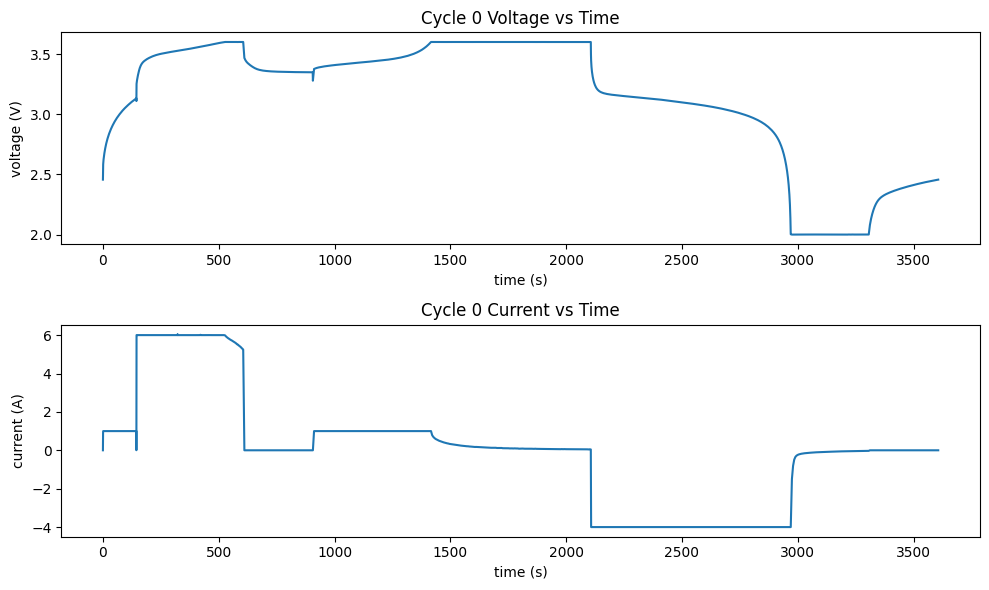

dict_keys(['cycle_number', 'current_in_A', 'voltage_in_V', 'charge_capacity_in_Ah', 'discharge_capacity_in_Ah', 'time_in_s', 'temperature_in_C', 'internal_resistance_in_ohm', 'Qdlin'])


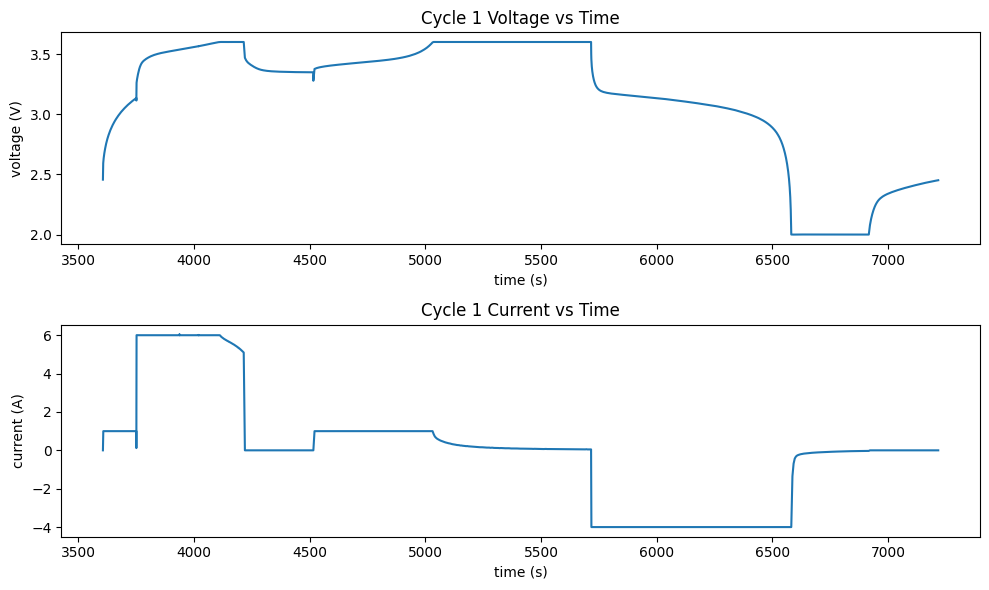

In [ ]:
cycle_data = data['cycle_data']
nominal_capacity_in_Ah = data['nominal_capacity_in_Ah']
total_time = []
total_voltage = []
total_current = []
total_current_rate = []
# get the data from the first two cycles
for i in [0,1]:
    one_cycle_data = cycle_data[i]
    print(one_cycle_data.keys())
    time = one_cycle_data['time_in_s']
    voltage = one_cycle_data['voltage_in_V']
    current = one_cycle_data['current_in_A']
    if len(total_time) >= 1:
        time = np.array(time) + total_time[-1][-1]  # make the time continuous
    fig  = plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    plt.plot(time, voltage)
    plt.xlabel('time (s)')
    plt.ylabel('voltage (V)')
    plt.title(f'Cycle {i} Voltage vs Time')
    plt.subplot(2,1,2)
    plt.plot(time, current)
    plt.xlabel('time (s)')  
    plt.ylabel('current (A)')
    plt.title(f'Cycle {i} Current vs Time')
    plt.tight_layout()
    plt.show()

    total_time.append(list(time))
    total_voltage.append(list(voltage))
    total_current.append(list(current))

